In [ ]:
# pip install yfinance

In [ ]:
# Question 1: Use yfinance to Extract Stock Data

# Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.
# pip install yfinance

import yfinance as yf



# Download Tesla stock data within the date range without the progress bar
url='https://finance.yahoo.com/quote/TSLA/history/'


tesla_data = yf.download('TSLA',  progress=False)

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [19]:
#  Question 2: Use Webscraping to Extract Tesla Revenue Data
# Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results

import pandas as pd
import requests
from bs4 import BeautifulSoup

def scrape_tesla_revenue():
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

    # Send a GET request to the URL with headers to mimic a browser
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing revenue data
    tables = soup.find_all('table', {'class': 'historical_data_table'})
    if len(tables) > 0:
        table = tables[0]
    else:
        raise ValueError("Could not find the revenue table on the webpage")

    # Extract data from the table
    data = []
    for row in table.find_all('tr')[1:]:  # Skip header row
        columns = row.find_all('td')
        if len(columns) >= 2:
            date = columns[0].text.strip()
            revenue = columns[1].text.strip()
            if revenue != '':
                data.append({'Date': date, 'Revenue': revenue})

    # Create a DataFrame
    tesla_revenue = pd.DataFrame(data)

    # Convert 'Revenue' column to numeric, removing any non-numeric characters
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

    return tesla_revenue

# Scrape the data
try:
    tesla_revenue = scrape_tesla_revenue()

    # Display the last five rows
    print(tesla_revenue.tail())

    # If you want to save to a CSV file
    tesla_revenue.to_csv('tesla_revenue.csv', index=False)
except Exception as e:
    print(f"An error occurred: {e}")

    Date  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


In [16]:
#  Question 3 Use yfinance to Extract Stock Data

# Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.
# import yfinance as yf
import pandas as pd

def get_gme_data():
    # Create a Ticker object for GameStop
    gme = yf.Ticker("GME")

    # Get the historical market data
    gme_data = gme.history(period="max")

    # Reset the index
    gme_data = gme_data.reset_index()

    # Save to CSV
    gme_data.to_csv('gme_data.csv', index=False)

    return gme_data

# Get the data
gme_data = get_gme_data()

# Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [18]:
#  Question 4
# Use Webscraping to Extract GME Revenue Data

# Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

import pandas as pd
import requests
from bs4 import BeautifulSoup

def scrape_gme_revenue():
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

    # Send a GET request to the URL with headers to mimic a browser
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing revenue data
    tables = soup.find_all('table', {'class': 'historical_data_table'})
    if len(tables) > 0:
        table = tables[0]
    else:
        raise ValueError("Could not find the revenue table on the webpage")

    # Extract data from the table
    data = []
    for row in table.find_all('tr')[1:]:  # Skip header row
        columns = row.find_all('td')
        if len(columns) >= 2:
            date = columns[0].text.strip()
            revenue = columns[1].text.strip()
            if revenue != '':
                data.append({'Date': date, 'Revenue': revenue})

    # Create a DataFrame
    gme_revenue = pd.DataFrame(data)

    # Convert 'Revenue' column to numeric, removing any non-numeric characters
    gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

    return gme_revenue

# Scrape the data
try:
    gme_revenue = scrape_gme_revenue()

    # Display the last five rows
    print(gme_revenue.tail())

    # If you want to save to a CSV file
    gme_revenue.to_csv('gme_revenue.csv', index=False)
except Exception as e:
    print(f"An error occurred: {e}")

    Date  Revenue
11  2013   8887.0
12  2012   9551.0
13  2011   9474.0
14  2010   9078.0
15  2009   8806.0


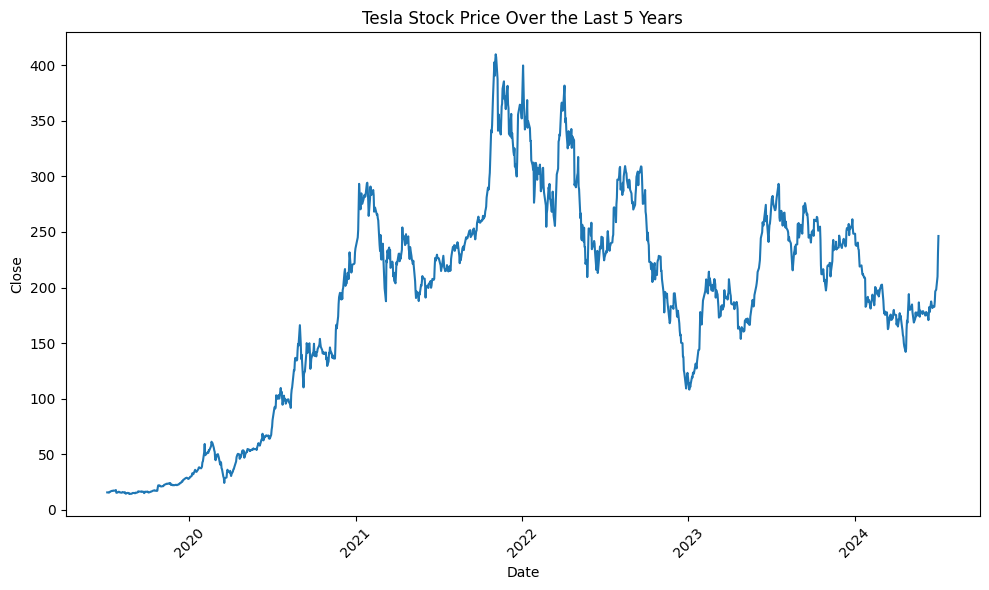

In [20]:
# Question 5: Plot Tesla Stock Graph

# Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

# Upload a screenshot of your results.

import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column])
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")

# Reset index to make Date a column
tesla_data = tesla_data.reset_index()

# Create the graph
make_graph(tesla_data, 'Date', 'Close', 'Tesla Stock Price Over the Last 5 Years')

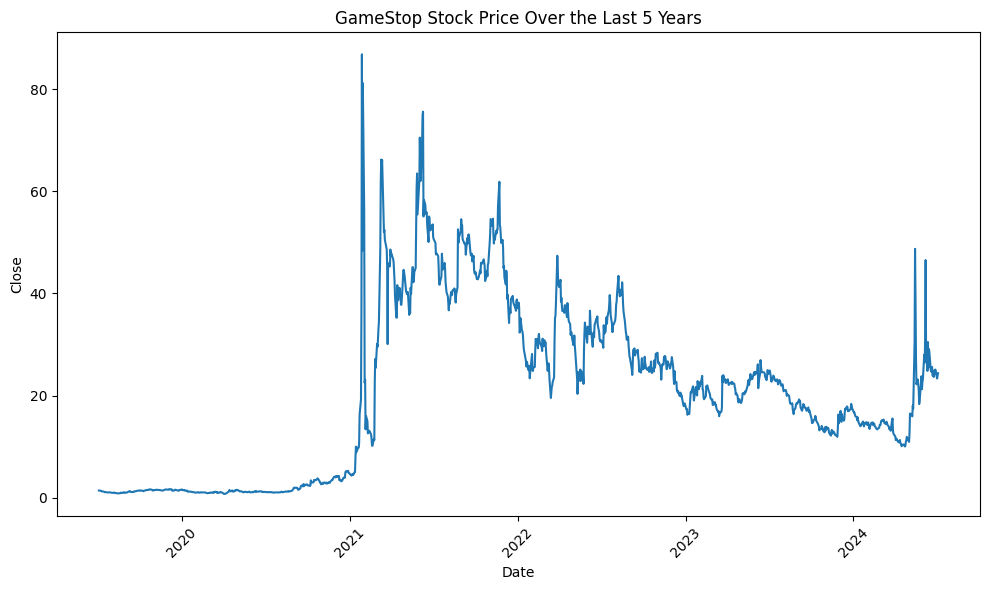

In [21]:
# Question 6: Plot GameStop Stock Graph

# Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

# Upload a screenshot of your results.

import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column])
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")

# Reset index to make Date a column
gme_data = gme_data.reset_index()

# Create the graph
make_graph(gme_data, 'Date', 'Close', 'GameStop Stock Price Over the Last 5 Years')